In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/International_Education_Costs.csv")
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


# EDA

In [ ]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [ ]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [ ]:
df.isnull().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


In [ ]:
df.isna().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Observation
- There are no null, nan, duplicated values in the dataset.
- Data is clean and we do exploratory analysis with it

# Exploratary Data Analysis

# UNIVARIATE PLOTS

In [ ]:
tuition = df["Tuition_USD"].value_counts()
tuition

,count
Tuition_USD,
0,103
3500,21
1500,20
4200,15
3800,14
...,...
53800,1
4700,1
3700,1


In [ ]:
# Checking program value_couunts
top_Program	 = df['Program'].value_counts()
top_Program

,count
Program,
Computer Science,312
Data Science,82
Computer Engineering,71
Software Engineering,57
Artificial Intelligence,53
...,...
Electronics,1
Electronic Engineering,1
Digital Design,1


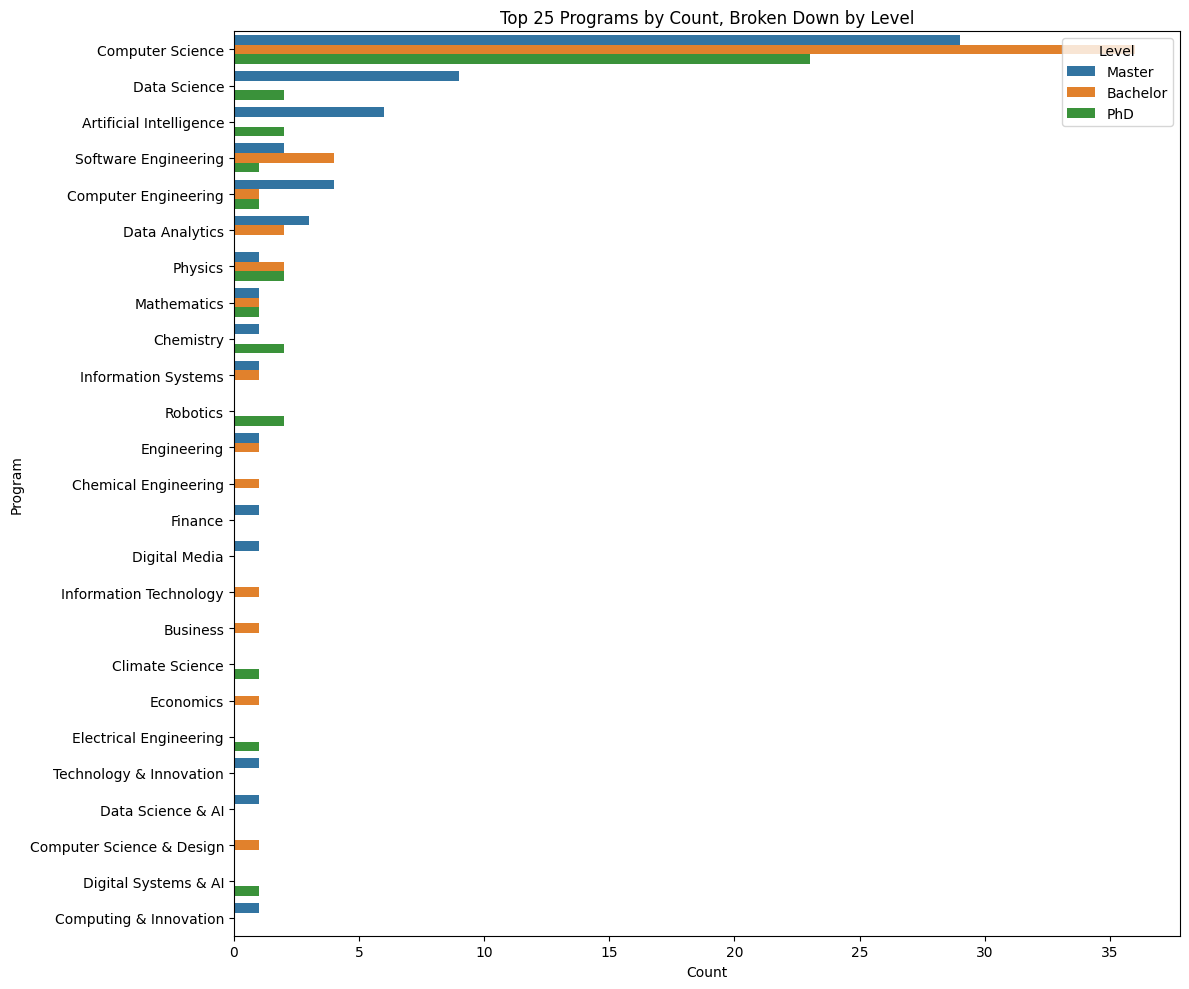

In [ ]:
top_program = df['Program'].value_counts().nlargest(25).index
df_top = df[df['Program'].isin(top_program)]
plt.figure(figsize=(12, 10))
sns.countplot(data=df_top, y='Program', hue='Level', order=top_program)
plt.title('Top 25 Programs by Count, Broken Down by Level')
plt.xlabel('Count')
plt.ylabel('Program')
plt.legend(title='Level', loc='upper right')
plt.tight_layout()
plt.show()

# Observation
- Here we did a plot for top 25 programs in our dataset
- The top 5 programs from our analysis are computer Science, Data Science, Artifical Intelligence, Software Engineering, Computer Engineering

In [ ]:
top_countries = df['Country'].value_counts()
top_countries

,count
Country,
UK,93
Australia,86
USA,78
Canada,76
Germany,33
...,...
Czech Republic,1
Hong Kong,1
Israel,1


<Axes: xlabel='count', ylabel='Country'>

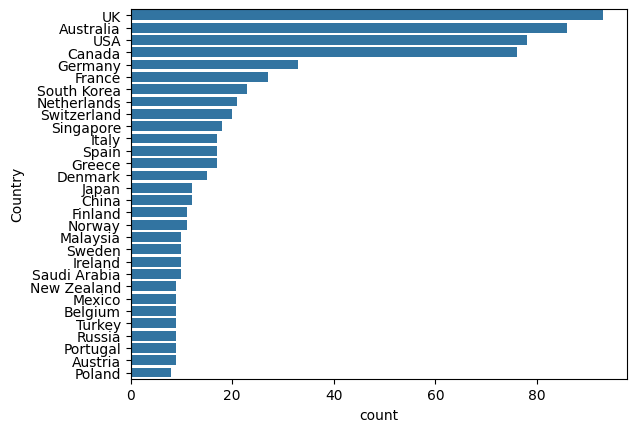

In [ ]:
top_countries = df['Country'].value_counts().nlargest(30).index
df_top = df[df['Country'].isin(top_countries)]

sns.countplot(y='Country', data=df_top, order=top_countries)


# Observation
- I have done my EDA using countplot on Country
- I have extracted top 30 countries from 71 countries
- The top five countries are UK, Australia, USA, Canada,Germany

In [ ]:
top_city = df['City'].value_counts()
top_city

,count
City,
Singapore,18
Melbourne,11
Sydney,11
London,10
Canberra,8
Newcastle,7
Brisbane,7
Cambridge,6
Seoul,6


<Axes: xlabel='count', ylabel='City'>

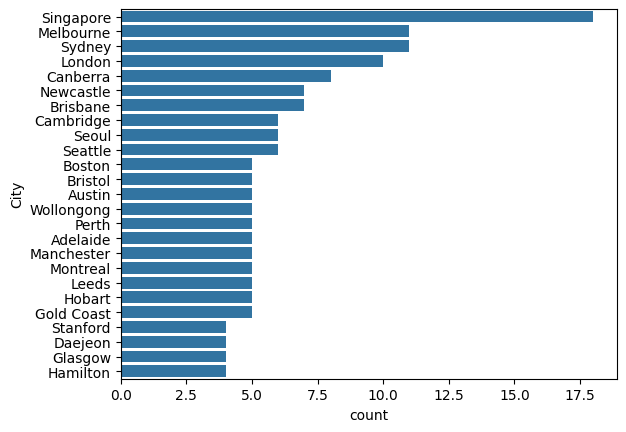

In [ ]:
top_cities = df["City"].value_counts().index
df_top = df[df["City"].isin(top_cities)]
sns.countplot(y="City", data = df_top,order=top_cities)

# Observation
- I have done countplot on city column
- The top 5 cities are Singapore, Melbourne, Sydney, London, Canberra

In [ ]:
university = df["University"].value_counts()
university

,count
University,
University of Washington,6
Australian National University,5
University of Melbourne,5
Griffith University,5
University of Sydney,5
...,...
UWE Bristol,1
University of Waikato,1
Singapore University of Technology,1


# Observations
- I have done value_counts for University
- There are total 61 universities

<Axes: xlabel='count', ylabel='University'>

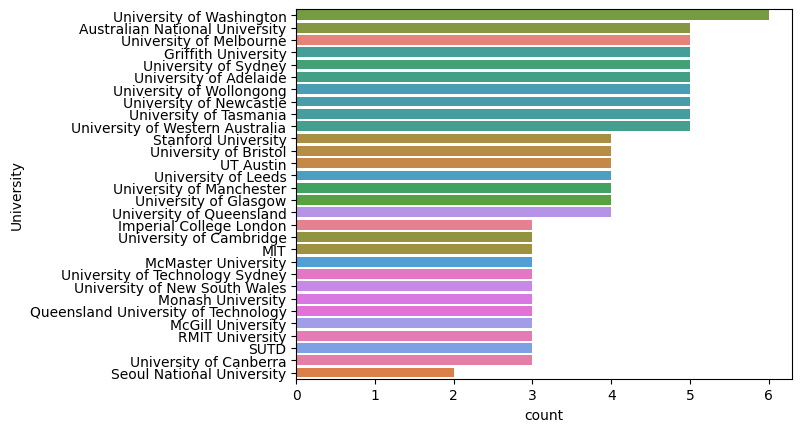

In [ ]:
top_university = df["University"].value_counts().nlargest(30).index
df_top = df[df["University"].isin(top_university)]
sns.countplot(y="University", data = df_top,order=top_university, hue = "University")

# Observation
- The top five Universities are University of Washington, Australian National University, University of Melbourne, Griffith University,University of Sydney

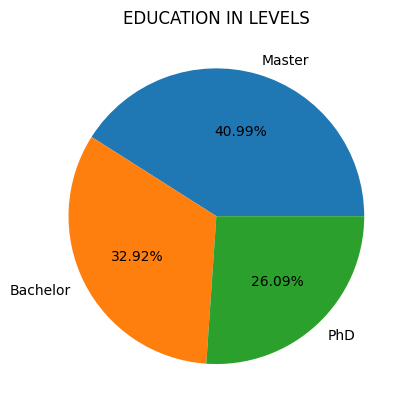

In [ ]:
Levels =df["Level"].value_counts()
plt.pie(Levels.values,labels=Levels.index,autopct="%0.2f%%")
plt.title("EDUCATION IN LEVELS")
plt.show()

# Observation
- The top level of degree is Master with 40.99 percent
- Second is Bachelor Degree level with count of 32.92 percent
- then Phd with count of 26.09 percent

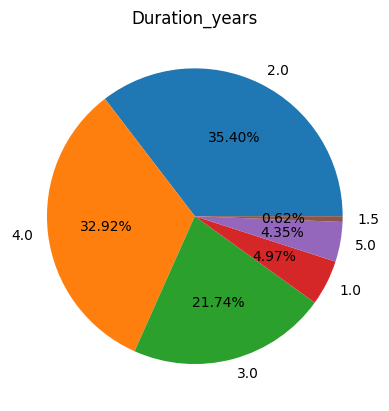

In [ ]:
Duration =df["Duration_Years"].value_counts()
plt.pie(Duration.values,labels=Duration.index,autopct="%0.2f%%")
plt.title("Duration_years")
plt.show()

# Observation
- Most of the programs are done in 2 years and other are in between 3 to to 5 years
- Very least programs are 1 and 6 which we can say as outliers

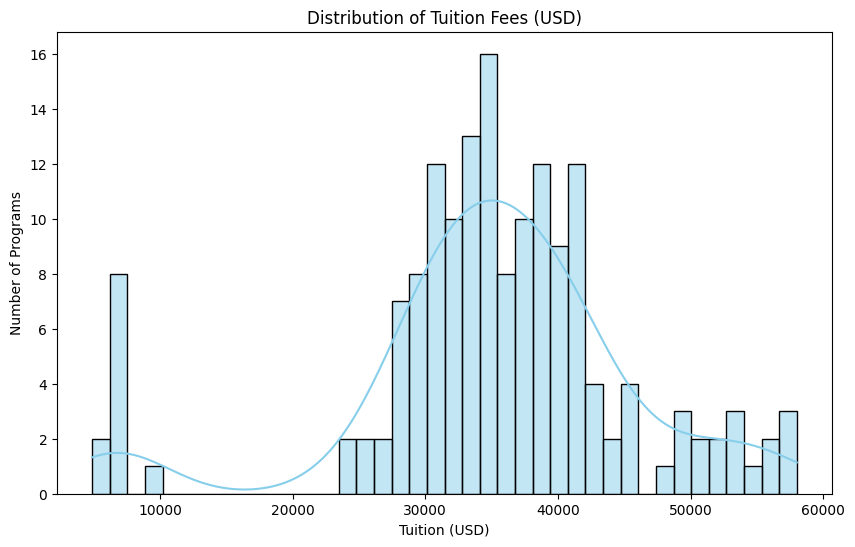

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tuition_USD'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Tuition Fees (USD)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Number of Programs')
plt.show()

# BI-VARIATE PLOTS

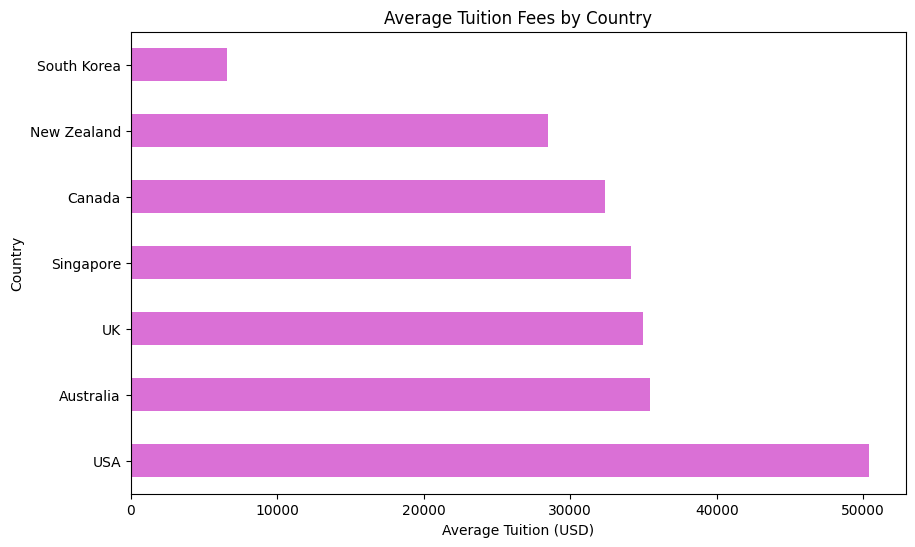

In [ ]:
top_countries = df['Country'].value_counts().nlargest(15).index
mean_tuition = df[df['Country'].isin(top_countries)].groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)

mean_tuition.plot(kind='barh', figsize=(10, 6), color='orchid')
plt.title('Average Tuition Fees by Country')
plt.xlabel('Average Tuition (USD)')
plt.show()


# OBSERVATION
- The total cost tution fee in us is $50000 i.e, 4,272,000
- Then Australia and UK, singaporer followed by

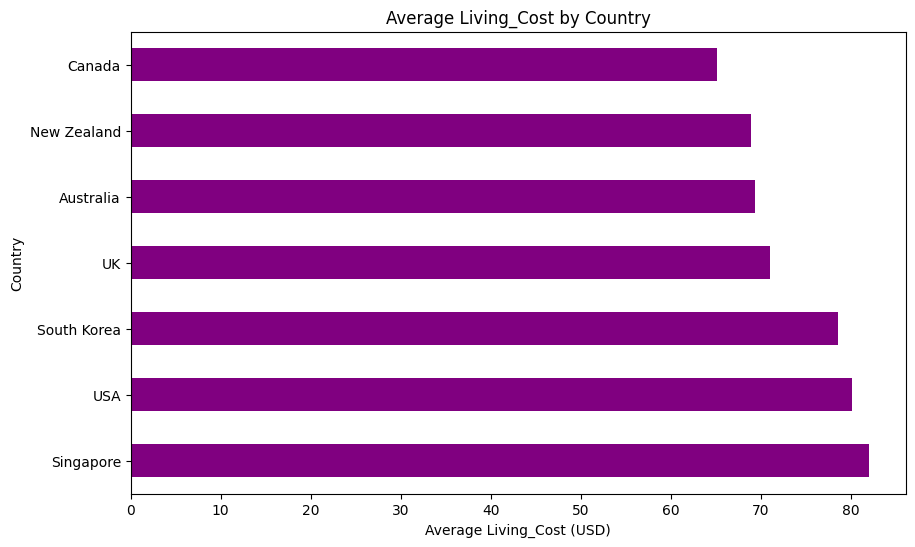

In [ ]:
top_countries = df['Country'].value_counts().nlargest(15).index
mean_tuition = df[df['Country'].isin(top_countries)].groupby('Country')['Living_Cost_Index'].mean().sort_values(ascending=False)

mean_tuition.plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Average Living_Cost by Country')
plt.xlabel('Average Living_Cost (USD)')
plt.show()

# OBSERVATION
- By comparing all the countries the most Expensive are Singapore, USA, South Korea, UK, Australia


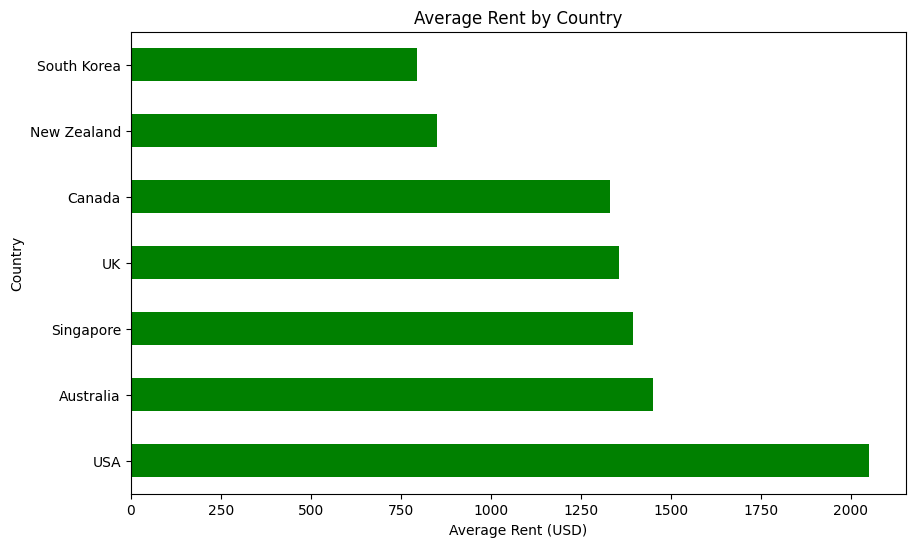

In [ ]:
top_countries = df['Country'].value_counts().nlargest(15).index
mean_tuition = df[df['Country'].isin(top_countries)].groupby('Country')['Rent_USD'].mean().sort_values(ascending=False)

mean_tuition.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Average Rent by Country')
plt.xlabel('Average Rent (USD)')
plt.show()

# OBSERVATION
- Comparing the rentin the top countries USA is more expensive followed by Australia, Singapore, UK, Canada

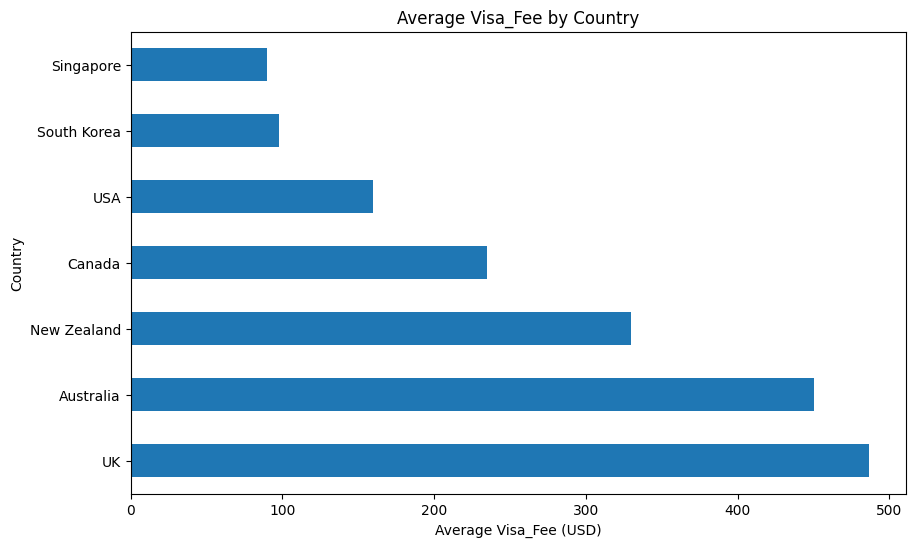

In [ ]:
top_countries = df['Country'].value_counts().nlargest(15).index
mean_tuition = df[df['Country'].isin(top_countries)].groupby('Country')['Visa_Fee_USD'].mean().sort_values(ascending=False)

mean_tuition.plot(kind='barh', figsize=(10, 6))
plt.title('Average Visa_Fee by Country')
plt.xlabel('Average Visa_Fee (USD)')
plt.show()

# OBSERVATION
- The top visa_fee of countries are UK, Australia, New Zealand, Canada, USA

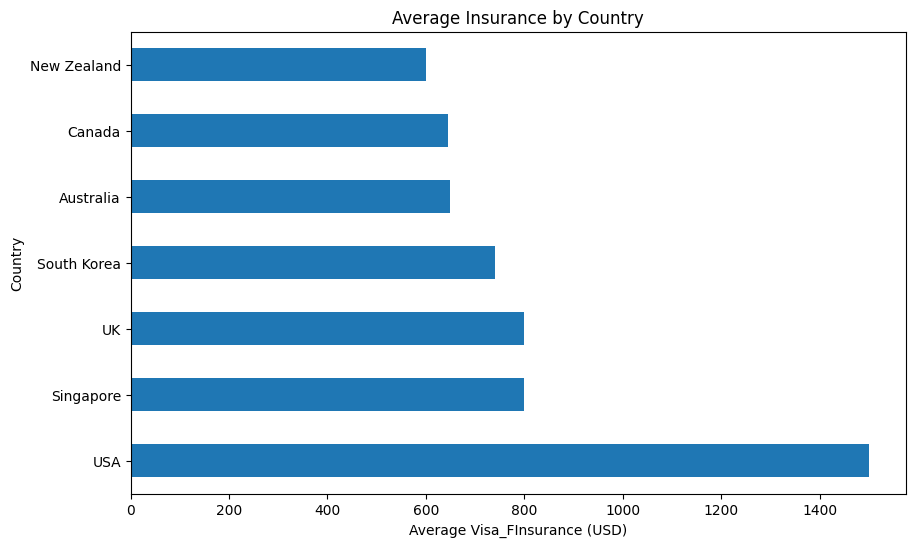

In [ ]:
top_countries = df['Country'].value_counts().nlargest(15).index
mean_tuition = df[df['Country'].isin(top_countries)].groupby('Country')['Insurance_USD'].mean().sort_values(ascending=False)

mean_tuition.plot(kind='barh', figsize=(10, 6))
plt.title('Average Insurance by Country')
plt.xlabel('Average Visa_Insurance (USD)')
plt.show()

# OBSERVATION
- The insurance of Companies listed as above
1. USA - 1600 followed by Singapore, UK, South Korea etc

# MULTI - VARIATE PLOTS

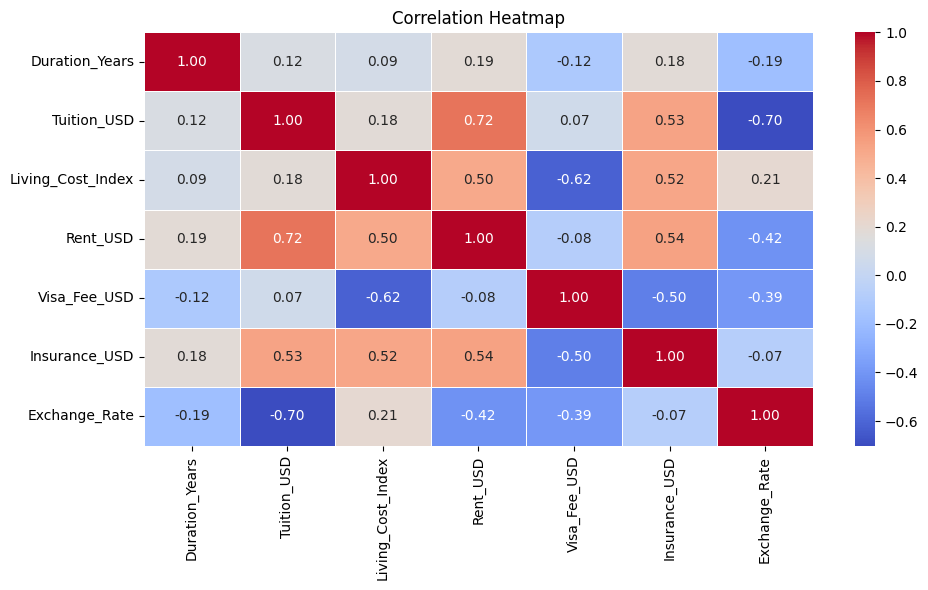

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# OBSERVATION
- As we can observe that there is no direct relation between duration of years and other columns
- Tution_USD has positive relation with Rent_USD and Insurance_USD and negative relation with Exchane_Rate
- Rent_USD has positive relation with Tuition_USD and Living_Cost_Index and Insurance_USD
- Visa_Fee_USD has negative relation with Living_Cost_Index and Insurance_USD
- Insurance_USD has positive relation between with Tuition_USD, Living_Cost_Index, Rent_USD and negative relation with Visa_Fee_USD
- Exchange_rate has negative relation with Tuition_USD

# PERFORMING MACHINE LEARNING

# Model Building - X and Y

In [ ]:
y = df["Tuition_USD"]
x = df.drop(columns = "Tuition_USD")
print(y.shape)
print(x.shape)

(907,)
(907, 11)


# Splitting data into train and test models

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 11)
(182, 11)
(725,)
(182,)


# Creating Pipeline

In [ ]:
# Creating the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
transformer = ColumnTransformer(transformers=[("t1",OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[0,1,2,3]),("t2",StandardScaler(),[5,6,7,8,9,10]),("t3",OrdinalEncoder(),[4])])
pipe = make_pipeline(transformer,KNeighborsRegressor())

# BUILDING MODEL

In [ ]:
# Buiding MOdel
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3]),
                                                 ('t2', StandardScaler(),
                                                  [5, 6, 7, 8, 9, 10]),
                                                 ('t3', OrdinalEncoder(),
                                                  [4])])),
                ('kneighborsregressor', KNeighborsRegressor())])

# CREATING MODEL USING PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = [("t1",ColumnTransformer(transformers=[("t1",OneHotEncoder(handle_unknown='ignore'),[0,1,2,3]),("t2",StandardScaler(),[5,6,7,8,9,10]),("t3",OrdinalEncoder(),[4])])),("t4",KNeighborsRegressor(n_neighbors=5,p=1,metric="minkowski"))])

In [ ]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('t1',
                 ColumnTransformer(transformers=[('t1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 1, 2, 3]),
                                                 ('t2', StandardScaler(),
                                                  [5, 6, 7, 8, 9, 10]),
                                                 ('t3', OrdinalEncoder(),
                                                  [4])])),
                ('t4', KNeighborsRegressor(p=1))])

In [ ]:
# Make prediction
y_pred = pipe.predict(X_test)
y_pred

array([ 2820., 35360., 14460.,  1488.,  5400., 31280., 35380., 51520.,
        5060.,     0.,  5680., 34900.,  3260.,  8040.,   300.,   820.,
       31540.,  3420., 47400., 33300.,  1428., 13800.,  4280., 41300.,
        3160.,  7900., 30480., 37620.,  4400.,  1440., 49740., 39560.,
        2640.,  2840., 36300., 36920., 30780., 47520.,  5400., 32200.,
        6140.,  4920.,  4660.,  1452.,  4940.,  4160., 30020.,  5040.,
       27060.,   720.,  1500., 12168., 12700.,  6240.,  3580.,  7260.,
          90.,  3680.,  1000.,  5520., 34700.,  3720.,  7800.,  3460.,
       28020.,   100., 46600., 34700.,   100., 36120.,  7920., 39640.,
        4480., 35400.,  2200., 34160., 40060., 23200.,  4940.,  7800.,
       49960., 14520.,  4480.,  5580., 20780.,  7320.,  3540.,  5520.,
       25960., 22080., 26380.,     0., 29760.,     0., 28560.,  3300.,
       29300., 27840.,  6040.,  4080.,  3400.,  4340., 29360.,  1440.,
        2400., 25600.,  5080.,  1440., 26720.,  5160.,  6920.,  2980.,
      

# Validating the Model

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.9012923237750895


In [ ]:
# Let us make predictions use train data
# Predict on train data
y_pred_train = pipe.predict(X_train)
score_train = r2_score(y_train, y_pred_train)

# Predict on test data
y_pred_test = pipe.predict(X_test)
y_pred_test

array([ 2820., 35360., 14460.,  1488.,  5400., 31280., 35380., 51520.,
        5060.,     0.,  5680., 34900.,  3260.,  8040.,   300.,   820.,
       31540.,  3420., 47400., 33300.,  1428., 13800.,  4280., 41300.,
        3160.,  7900., 30480., 37620.,  4400.,  1440., 49740., 39560.,
        2640.,  2840., 36300., 36920., 30780., 47520.,  5400., 32200.,
        6140.,  4920.,  4660.,  1452.,  4940.,  4160., 30020.,  5040.,
       27060.,   720.,  1500., 12168., 12700.,  6240.,  3580.,  7260.,
          90.,  3680.,  1000.,  5520., 34700.,  3720.,  7800.,  3460.,
       28020.,   100., 46600., 34700.,   100., 36120.,  7920., 39640.,
        4480., 35400.,  2200., 34160., 40060., 23200.,  4940.,  7800.,
       49960., 14520.,  4480.,  5580., 20780.,  7320.,  3540.,  5520.,
       25960., 22080., 26380.,     0., 29760.,     0., 28560.,  3300.,
       29300., 27840.,  6040.,  4080.,  3400.,  4340., 29360.,  1440.,
        2400., 25600.,  5080.,  1440., 26720.,  5160.,  6920.,  2980.,
      

In [ ]:
score_test = r2_score(y_test, y_pred_test)
print("Train R2 Score:", score_train)
print("Test R2 Score:", score_test)

Train R2 Score: 0.9650798248030421
Test R2 Score: 0.9012923237750895


In [ ]:
## Pickling the pipe object
import pickle
with open("ML_Project_Regression.pkl","wb") as f:
  pickle.dump(pipe,f)                              # WB - means write in binary
                                                    # W- write, B- Binary